In [120]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [121]:
# Download data
# !wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv

In [122]:
# Read data set
df = pd.read_csv("Data/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


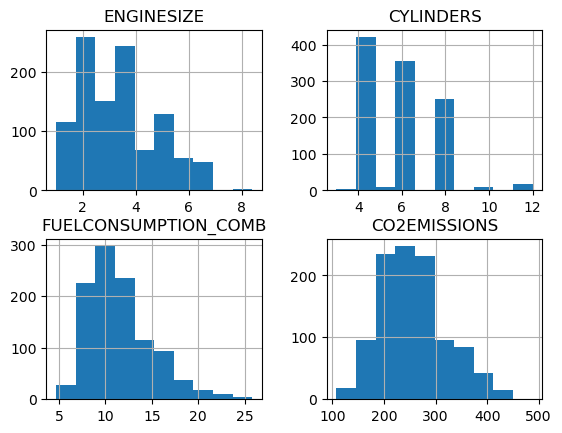

In [123]:
# Explore data set
cdf = df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]
cdf.hist()
plt.show()

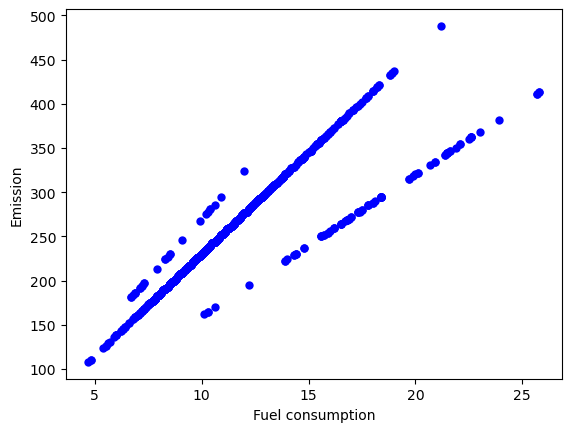

In [124]:
# Plot FUELCONSUMPTION_COMB against CO2EMISSIONS
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="blue", linewidths=0)
plt.xlabel("Fuel consumption")
plt.ylabel("Emission")
plt.show()

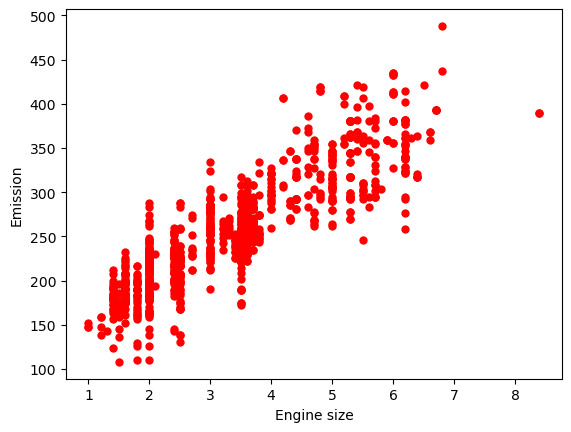

In [125]:
# Plot ENGINESIZE against CO2EMISSIONS
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="red", linewidths=0)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

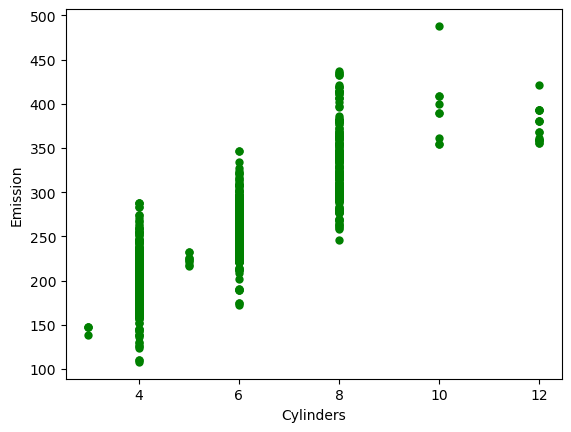

In [126]:
# Plot CYLINDERS against emCO2EMISSIONSission
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="green", linewidths=0)
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [134]:
# Create train and test data set
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

In [135]:
# 1st Modeling (Engine size)
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# Display parameters
print("Coefficients: ", regr.coef_)
print("Intercept: ",regr.intercept_)

Coefficients:  [[39.48871745]]
Intercept:  [124.40290989]


Text(0, 0.5, 'Emission')

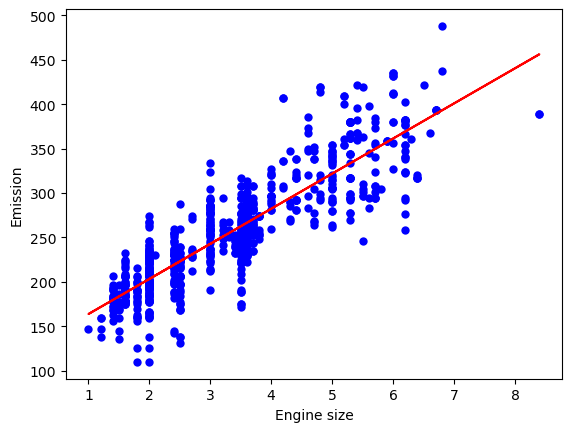

In [136]:
# Plot fit line over data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color="blue", linewidths=0)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], "r")
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [137]:
# Predict and evaluate model
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
predicted_y = regr.predict(test_x)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(predicted_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predicted_y) )

Mean absolute error (MAE): 22.09
Residual sum of squares (MSE): 810.73
R2-score: 0.79


In [138]:
# 2nd Modeling (Fuel consumption)
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["FUELCONSUMPTION_COMB"]])
regr.fit(train_x, train_y)

# Display parameters
print("Coefficients: ", regr.coef_)
print("Intercept: ",regr.intercept_)

Coefficients:  [[16.37750732]]
Intercept:  [66.55235514]


Text(0, 0.5, 'Emission')

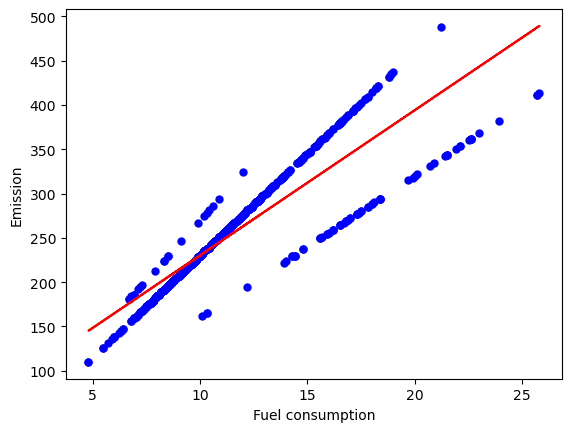

In [139]:
# Plot fit line over data
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS,  color="blue", linewidths=0)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], "r")
plt.xlabel("Fuel consumption")
plt.ylabel("Emission")

In [140]:
# Predict and evaluate model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
predicted_y = regr.predict(test_x)

print("Mean absolute error (MAE): %.2f" % np.mean(np.absolute(predicted_y - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predicted_y - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predicted_y) )

Mean absolute error (MAE): 19.98
Residual sum of squares (MSE): 786.24
R2-score: 0.79
